# importing libraries and dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv('Ads_CTR_Optimisation.csv')

# implementing Upper confidence Bound

In [4]:
N = 10000 # the number of users tested on you can replace with a number you want to test on
d = len(data.columns) # the number of ads you can subtitue the number with ads number of your dataset

ads_selected = []
numbers_of_selection = np.zeros(len(data.columns)) # or you can use [0] * d
sum_of_rewards = np.zeros(len(data.columns)) # or you can use [0] * d
total_reward = sum(sum_of_rewards)

In [5]:
import math
for n in range(N):
    ad = 0
    max_upper_bound = 0
    for i in range(d):
        if numbers_of_selection[i] != 0: 
            average_reward = sum_of_rewards[i]/numbers_of_selection[i]
            confidence_interval = math.sqrt(3/2 * (math.log(n + 1)/numbers_of_selection[i]))
            upper_bound = average_reward + confidence_interval
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selection[ad] += 1
    reward = data.values[n , ad]
    sum_of_rewards[ad] += reward
    total_reward = sum(sum_of_rewards) # you can use total_reward += reward

# data visualization for UCB

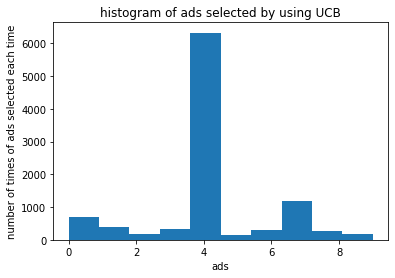

In [6]:
plt.hist(ads_selected)
plt.title('histogram of ads selected by using UCB') 
plt.xlabel('ads')
plt.ylabel('number of times of ads selected each time')
plt.show()

# implementing thompson sampling

In [7]:
ads_selected = []
number_of_gains = [0] * d
number_of_loses = [0] * d
total_rewards = 0

In [8]:
import random
for n in range(N):
    ad = 0
    max_random = 0
    for i in range(d):
        theta = random.betavariate(number_of_gains[i] + 1, number_of_loses[i] + 1)
        if theta > max_random:
            max_random = theta
            ad = i
    ads_selected.append(ad)
    reward = data.values[n, ad] # in real world it is the ad just selected or not 
    if reward == 1:
        number_of_gains[ad] += 1
    else:
        number_of_loses[ad] += 1
    total_rewards += reward

# data visualization  for thompson sampling

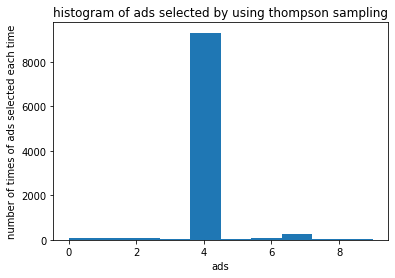

In [9]:
plt.hist(ads_selected)
plt.title('histogram of ads selected by using thompson sampling') 
plt.xlabel('ads')
plt.ylabel('number of times of ads selected each time')
plt.show()